In [1]:
!pip3 install seaborn

In [2]:
#İmporting libaries

In [3]:
!pip3 install statsmodels

In [4]:
!pip3 install xgboost

In [5]:
!pip3 install sklearn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import xgboost

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [7]:
data=pd.read_csv("../input/marrket-mix-dataset/mktmix.csv")

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Reading the data

In [10]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [11]:
data = data.rename(columns = { 'NewVolSales' : 'NewVolSales', 
                  'Base_Price' : 'Base_Price', 
                  'Radio ':  'Radio', 
                  'InStore' : 'InStore', 
                  'NewspaperInserts' : 'NewspaperInserts', 
                  'Discount' : 'Discount' , 
                  'TV' : 'TV', 
                  'Stout' : 'Stout', 
                  'Website_Campaign ':  'Web'})

In [12]:
# Understanding the data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NewVolSales       104 non-null    int64  
 1   Base_Price        104 non-null    float64
 2   Radio             100 non-null    float64
 3   InStore           104 non-null    float64
 4   NewspaperInserts  6 non-null      object 
 5   Discount          104 non-null    float64
 6   TV                104 non-null    float64
 7   Stout             104 non-null    float64
 8   Web               14 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


In [14]:
data.shape

(104, 9)

In [15]:
data.isnull().sum()

NewVolSales          0
Base_Price           0
Radio                4
InStore              0
NewspaperInserts    98
Discount             0
TV                   0
Stout                0
Web                 90
dtype: int64

In [16]:
# Preprocessing

In [17]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Web
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [18]:
data.isnull().sum()

NewVolSales          0
Base_Price           0
Radio                4
InStore              0
NewspaperInserts    98
Discount             0
TV                   0
Stout                0
Web                 90
dtype: int64

In [19]:
data["Web"] = data["Web"].fillna("other")
data["NewspaperInserts"] = data["NewspaperInserts"].fillna("other")
data["Radio"] = data["Radio"].fillna(data["Radio"].median())

In [20]:
data.isnull().sum()

NewVolSales         0
Base_Price          0
Radio               0
InStore             0
NewspaperInserts    0
Discount            0
TV                  0
Stout               0
Web                 0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NewVolSales       104 non-null    int64  
 1   Base_Price        104 non-null    float64
 2   Radio             104 non-null    float64
 3   InStore           104 non-null    float64
 4   NewspaperInserts  104 non-null    object 
 5   Discount          104 non-null    float64
 6   TV                104 non-null    float64
 7   Stout             104 non-null    float64
 8   Web               104 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


In [22]:
data.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,20171.067308,15.306740,257.528846,32.918567,0.022059,141.009774,2.545966
std,1578.604670,0.528902,85.392805,13.682570,0.027668,42.949231,0.310070
min,17431.000000,13.735724,0.000000,10.782000,0.000000,37.656174,1.818600
25%,19048.750000,15.029276,235.750000,22.183750,0.000000,117.108343,2.316450
50%,19943.500000,15.332887,278.500000,31.161500,0.000000,138.581542,2.502120
75%,20942.750000,15.642632,312.250000,41.079000,0.049423,175.681780,2.814315
max,24944.000000,16.281020,399.000000,68.119000,0.090763,240.291967,3.158620


In [23]:
#Visulations

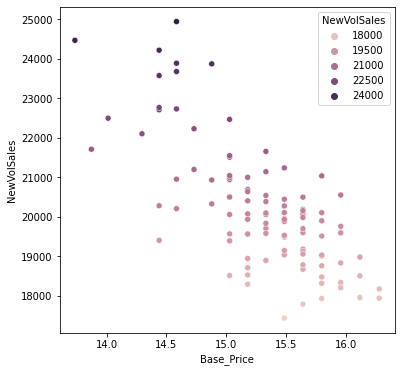

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data['Base_Price'],y=data['NewVolSales'],hue=data['NewVolSales'])
plt.xlabel('Base_Price')
plt.ylabel('NewVolSales')
plt.show()

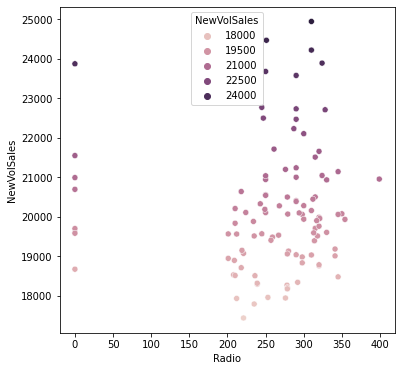

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data['Radio'],y=data['NewVolSales'],hue=data['NewVolSales'])
plt.xlabel('Radio')
plt.ylabel('NewVolSales')
plt.show()

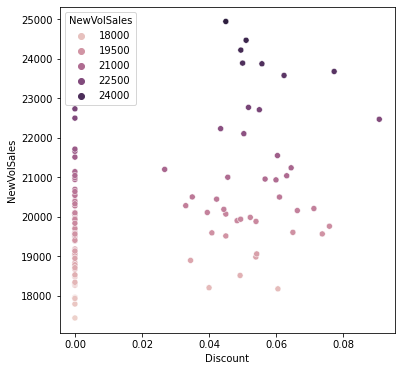

In [26]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data['Discount'],y=data['NewVolSales'],hue=data['NewVolSales'])
plt.xlabel('Discount')
plt.ylabel('NewVolSales')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 360x360 with 0 Axes>

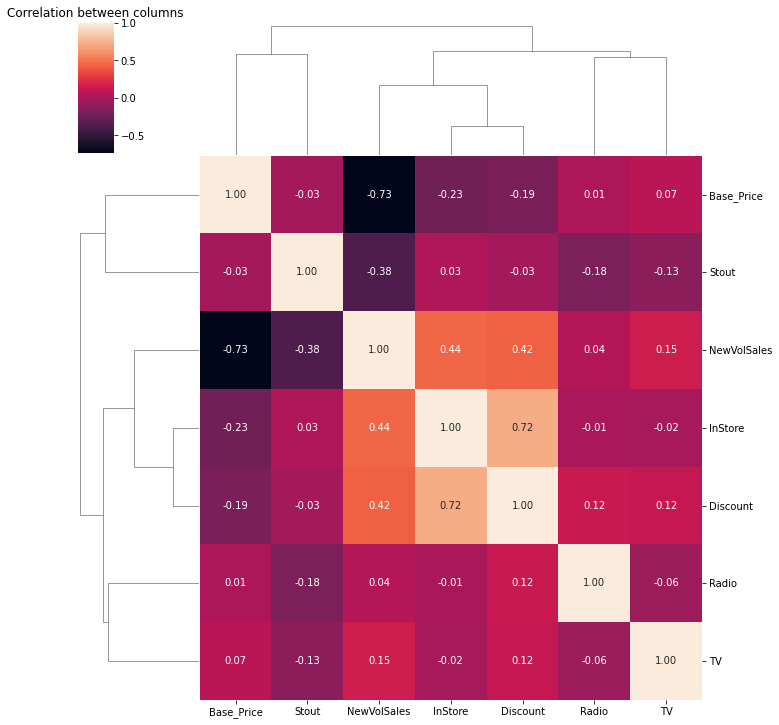

In [27]:
corr_matrix = data.corr()
plt.figure(figsize=(5,5))
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between columns")
plt.show

In [28]:
# Editing categorical variables

In [29]:
cat_col = ["Web","NewspaperInserts"]
data = pd.get_dummies(data, columns = cat_col)

In [30]:
data = data.drop(["Web_other","NewspaperInserts_other"], axis = 1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NewVolSales              104 non-null    int64  
 1   Base_Price               104 non-null    float64
 2   Radio                    104 non-null    float64
 3   InStore                  104 non-null    float64
 4   Discount                 104 non-null    float64
 5   TV                       104 non-null    float64
 6   Stout                    104 non-null    float64
 7   Web_Facebook             104 non-null    uint8  
 8   Web_Twitter              104 non-null    uint8  
 9   Web_Website Campaign     104 non-null    uint8  
 10  NewspaperInserts_Insert  104 non-null    uint8  
dtypes: float64(6), int64(1), uint8(4)
memory usage: 6.2 KB


In [32]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Web_Facebook,Web_Twitter,Web_Website Campaign,NewspaperInserts_Insert
0,19564,15.029276,245.0,15.452,0.000,101.780000,2.28342,0,0,0,0
1,19387,15.029276,314.0,16.388,0.000,76.734000,2.22134,0,0,0,0
2,23889,14.585093,324.0,62.692,0.050,131.590200,2.00604,0,0,0,0
3,20055,15.332887,298.0,16.573,0.000,119.627060,2.19897,0,0,0,0
4,20064,15.642632,279.0,41.504,0.045,103.438118,1.81860,0,0,0,0


In [33]:
# Handling outliers 

In [34]:
chechk_outliers = ["Base_Price","Radio","InStore","Discount","TV","Stout"]

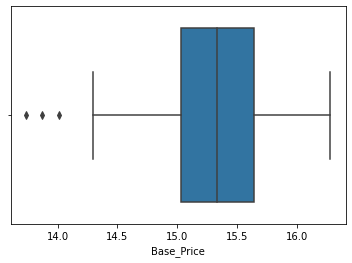

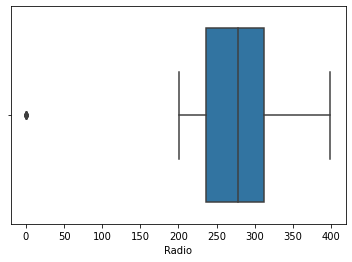

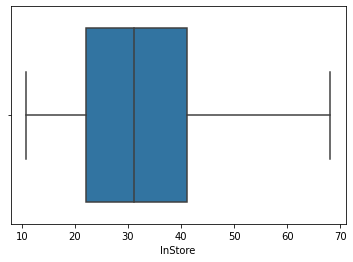

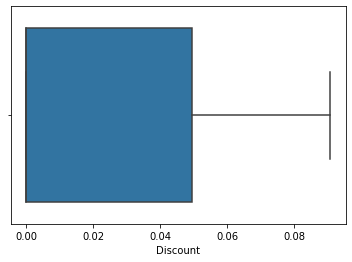

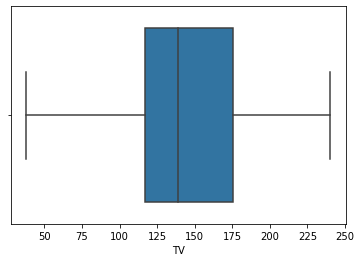

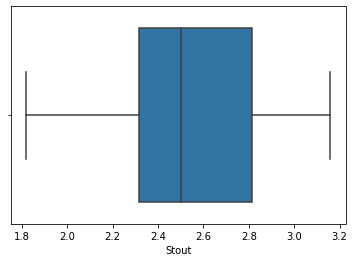

In [35]:
for c in chechk_outliers:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

In [36]:
# #

In [37]:
outliers = ["Radio","Base_Price"]

In [38]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [39]:
for i in data[outliers]:
    data[i]=treat_outlier(data[i])

In [40]:
# Modelling 

In [41]:
x = data.drop(["NewVolSales"],axis = 1)
y = data.NewVolSales

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.columns = x.columns
x_test.columns = x.columns

In [45]:
svr = SVR(kernel = "rbf")
ada = AdaBoostRegressor()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
knn = neighbors.KNeighborsRegressor()
mlp = MLPRegressor()
names = ["SVR","AdaBoostRegressor","XGBRegressor","RandomForestRegressor","DecisionTreeRegressor",
        "GradientBoostingRegressor","KNeighborsRegressor","MLPRegressor"]
models = [svr, ada, xgb, rfr, dtr, gbr, knn, mlp]

In [46]:
for name, clf in zip(names, models):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        mse = mean_squared_error(y_test, y_pred) 
        print("{}: mse score: {}".format(name, mse))
        r2 = r2_score(y_test, y_pred)
        print("{}: r2 score: {}".format(name, r2))
        mae = mean_absolute_error(y_test, y_pred)
        print("{}: mea score: {}".format(name, mae))
        mape = np.mean(abs((y_pred-y_test)/y_test))*100
        print("{}: mape :{}".format(name,mape))
        print("\n")

SVR: mse score: 4514270.289287768
SVR: r2 score: -0.2136858147814782
SVR: mea score: 1618.370475607868
SVR: mape :7.424368875771746


AdaBoostRegressor: mse score: 939954.7293868606
AdaBoostRegressor: r2 score: 0.7472881222241602
AdaBoostRegressor: mea score: 708.6971714055924
AdaBoostRegressor: mape :3.379513495152125


XGBRegressor: mse score: 627235.2510486784
XGBRegressor: r2 score: 0.8313644336859617
XGBRegressor: mea score: 644.0278087797619
XGBRegressor: mape :3.1085794442745307


RandomForestRegressor: mse score: 665256.6959095246
RandomForestRegressor: r2 score: 0.8211421640104821
RandomForestRegressor: mea score: 639.4157142857144
RandomForestRegressor: mape :3.0486571742272255


DecisionTreeRegressor: mse score: 1132644.6666666667
DecisionTreeRegressor: r2 score: 0.6954823975907486
DecisionTreeRegressor: mea score: 842.6666666666666
DecisionTreeRegressor: mape :3.987933427322016


GradientBoostingRegressor: mse score: 699449.7349224861
GradientBoostingRegressor: r2 score: 0.

In [47]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)

In [48]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_poly, y_train)

In [49]:
y_pred = lin_reg.predict(poly_reg.transform(x_test))

In [50]:
mse = mean_squared_error(y_test, y_pred)
print("MSE score",mse)
r2 = r2_score(y_test, y_pred)
print("r2 score",r2)
mea = mean_absolute_error(y_test, y_pred)
print("MAE score",mea)

MSE score 1231044.1768676771
r2 score 0.6690271607397771
MAE score 870.1663344047805


In [51]:
parametresGrid_rfr = {"max_depth":[1,3,5,8,10],
                 "max_features":[2,5,10],
                 "min_samples_split":[5,10,20],
                 "n_estimators":[50,100,150,200]}

In [52]:
rfrr = GridSearchCV(rfr, parametresGrid_rfr, cv = 10, scoring="neg_mean_squared_error", refit = True,
                  n_jobs = -1, verbose = 2)

In [53]:
rfrr.fit(x_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.8min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 8, 10],
                         'max_features': [2, 5, 10],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [54]:
rfrr.best_estimator_

RandomForestRegressor(max_depth=8, max_features=5, min_samples_split=5)

In [55]:
y_pred = rfrr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mse score : ", mse)
r2 = r2_score(y_test, y_pred)
print("Random Forest R2 score",r2)
mape = np.mean(abs((y_pred-y_test)/y_test))*100
print("Random Forest mape score",mape)

Random Forest Mse score :  756451.8984541863
Random Forest R2 score 0.796623843969428
Random Forest mape score 3.3580048022953912


In [56]:
parametresGrid_gbr = {"max_depth":[3,5,8,10],
                 "max_features":[2,5,10],
                 "min_samples_split":[10,50,100],
                 "n_estimators":[100,200,500,1000]}

In [57]:
gbrr = GridSearchCV(gbr, parametresGrid_gbr, cv = 10, scoring="neg_mean_squared_error", refit = True,
                  n_jobs = -1, verbose = 2)

In [58]:
gbrr.fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 509 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 1157 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10], 'max_features': [2, 5, 10],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [59]:
gbrr.best_estimator_

GradientBoostingRegressor(max_depth=8, max_features=2, min_samples_split=50,
                          n_estimators=200)

In [60]:
y_pred = gbrr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boost Mse score : ", mse)
r2 = r2_score(y_test, y_pred)
print("Gradient Boost R2 score",r2)
mape = np.mean(abs((y_pred-y_test)/y_test))*100
print("Gradient Boost mape score",mape)

Gradient Boost Mse score :  692680.8249557939
Gradient Boost R2 score 0.813769039613129
Gradient Boost mape score 3.5402685763865236


In [61]:
parametresGrid_xgb = {"nthread":[4],"objective":["reg:linear"],
                 "learnin_rate":[0.03,0.05,0.07], "max_depth" : [5,6,7],
                 "min_child_weight":[4,5,6], "silent":[1],
                 "subsample":[0.7], "colsample_bytree":[0.7],
                 "n_estimators":[100,500,1000]}

In [62]:
xgbr = GridSearchCV(xgb, parametresGrid_xgb, cv = 10, scoring="neg_mean_squared_error", refit = True,
                n_jobs = -1, verbose = 2)

In [63]:
xgbr.fit(x_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 94.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 223.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 394.1min


[04:22:32] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:32] WARNING: ../src/learner.cc:573: 
Parameters: { "learnin_rate", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 509.0min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
             

In [64]:
xgbr.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learnin_rate=0.03, learning_rate=0.300000012, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [65]:
xgbr = XGBRegressor(colsample_bytree=0.7, learnin_rate=0.03, max_depth=7,
             min_child_weight=4, nthread=4, silent=1, subsample=0.7).fit(x_train, y_train)

[04:22:32] WARNING: ../src/learner.cc:573: 
Parameters: { "learnin_rate", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [66]:
y_pred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("XGBoost Mse score : ", mse)
r2 = r2_score(y_test, y_pred)
print("XGBoost R2 score",r2)
mape = np.mean(abs((y_pred-y_test)/y_test))*100
print("XGBoost mape score",mape)

XGBoost Mse score :  739906.476835705
XGBoost R2 score 0.8010721694420034
XGBoost mape score 3.4246753214443677


<AxesSubplot:>

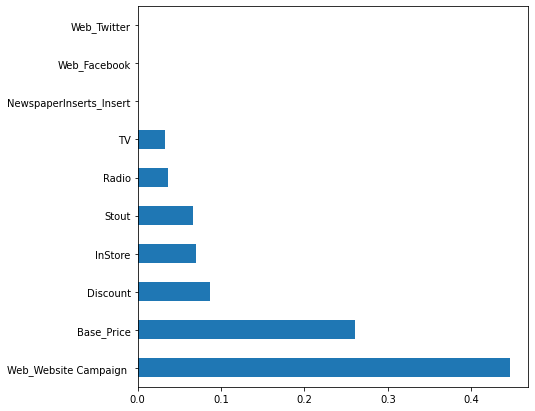

In [67]:
feat_importances = pd.Series(xgbr.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(7,7))

In [68]:
xgbr.feature_importances_

array([0.26103607, 0.0366353 , 0.06946146, 0.0863184 , 0.03313969,
       0.06668629, 0.        , 0.        , 0.4457751 , 0.00094776],
      dtype=float32)

In [69]:
y_pred = xgbr.predict(x_train)

In [70]:
model_xgb = sm.ols(formula="y_pred~x_train", data=x_train).fit()
print(model_xgb.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     25.52
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           7.46e-20
Time:                        04:22:34   Log-Likelihood:                -657.63
No. Observations:                  83   AIC:                             1337.
Df Residuals:                      72   BIC:                             1364.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.002e+04     78.722    254.303      0.0

In [71]:
 def get_params(x,y):
        model = sm.ols(formula="y~x", data=x).fit()
        coef = model.params
        coef = coef[1:]
        return coef

In [72]:
coef = get_params(x_train,y_pred)
coef

x[0]   -1051.661422
x[1]     -57.147158
x[2]     415.411026
x[3]     117.844422
x[4]     132.828213
x[5]    -507.974061
x[6]      86.474801
x[7]       9.136749
x[8]    -345.606310
x[9]      53.242380
dtype: float64

In [73]:
def elasticty(x,y,get_params):
      x_mean = x.mean()
      elasticity = np.column_stack([coef, x_mean]).tolist()
      elasticity = pd.DataFrame(elasticity)
      elasticity.columns = (["Coeffiecents","Mean"])
      elasticity["elasticty_value"] = elasticity["Coeffiecents"]*(elasticity["Mean"]/y.mean())
      elasticity.head(20)
      return elasticity

In [74]:
elasticty_data = elasticty(x,y,coef)
elasticty_data

,Coeffiecents,Mean,elasticty_value
0,-1051.661422,15.323059,-0.798900
1,-57.147158,257.528846,-0.729611
2,415.411026,32.918567,0.677938
3,117.844422,0.022059,0.000129
4,132.828213,141.009774,0.928561
5,-507.974061,2.545966,-0.064116
6,86.474801,0.038462,0.000165
7,9.136749,0.038462,0.000017
8,-345.606310,0.057692,-0.000988
9,53.242380,0.057692,0.000152


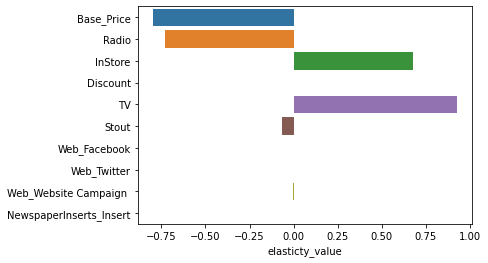

In [75]:
sns.barplot(x=elasticty_data["elasticty_value"],
            y=x.columns, data=elasticty_data)
plt.show()